# Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inspecting data

In [6]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard[1].csv')

In [7]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [9]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [10]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [11]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    13897
1.0       56
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [12]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [13]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [14]:
# statistical measures of the data
legit.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [16]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [17]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [18]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6399,7597,-1.680267,0.230668,1.362597,-0.137035,-2.181965,0.154388,0.793512,0.309980,1.694927,...,0.092117,0.565006,0.083351,0.386382,-0.139994,0.362205,0.432446,-0.075946,367.60,0.0
4266,3755,1.372955,-0.730758,-0.931581,-1.604395,1.443775,3.280036,-1.150876,0.706540,0.358377,...,-0.269204,-0.906016,0.068290,0.920775,0.351633,-0.509949,-0.022707,0.018000,56.66,0.0
1659,1286,-1.953689,2.020370,0.220852,0.011983,-1.164103,-1.096646,-0.380933,1.246447,-0.460241,...,-0.169265,-0.711974,0.132289,0.350639,-0.040114,0.087680,0.117387,0.027827,17.99,0.0
1165,909,-1.883261,0.491980,2.749590,-0.093186,0.872412,0.877891,0.260558,-1.236701,0.549884,...,0.568692,0.228457,-0.672971,-0.791105,0.269186,0.888587,-0.203263,-0.579936,51.67,0.0
11481,19900,1.338104,-0.587704,0.720601,-0.302992,-1.201888,-0.597025,-0.841171,-0.032101,0.788075,...,-0.123523,-0.124229,0.009204,0.474409,0.428037,-0.308517,-0.025959,-0.004300,10.00,0.0


In [20]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [21]:
new_dataset['Class'].value_counts()

0.0    492
1.0     56
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,9704.575203,-0.204518,0.233296,0.862402,0.340077,-0.077318,0.154991,-0.136256,-0.057279,0.974481,...,-0.002469,-0.066179,-0.163511,-0.033061,0.053124,0.156133,0.088703,-0.007503,0.011760,65.758679
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


# **Data visualization**

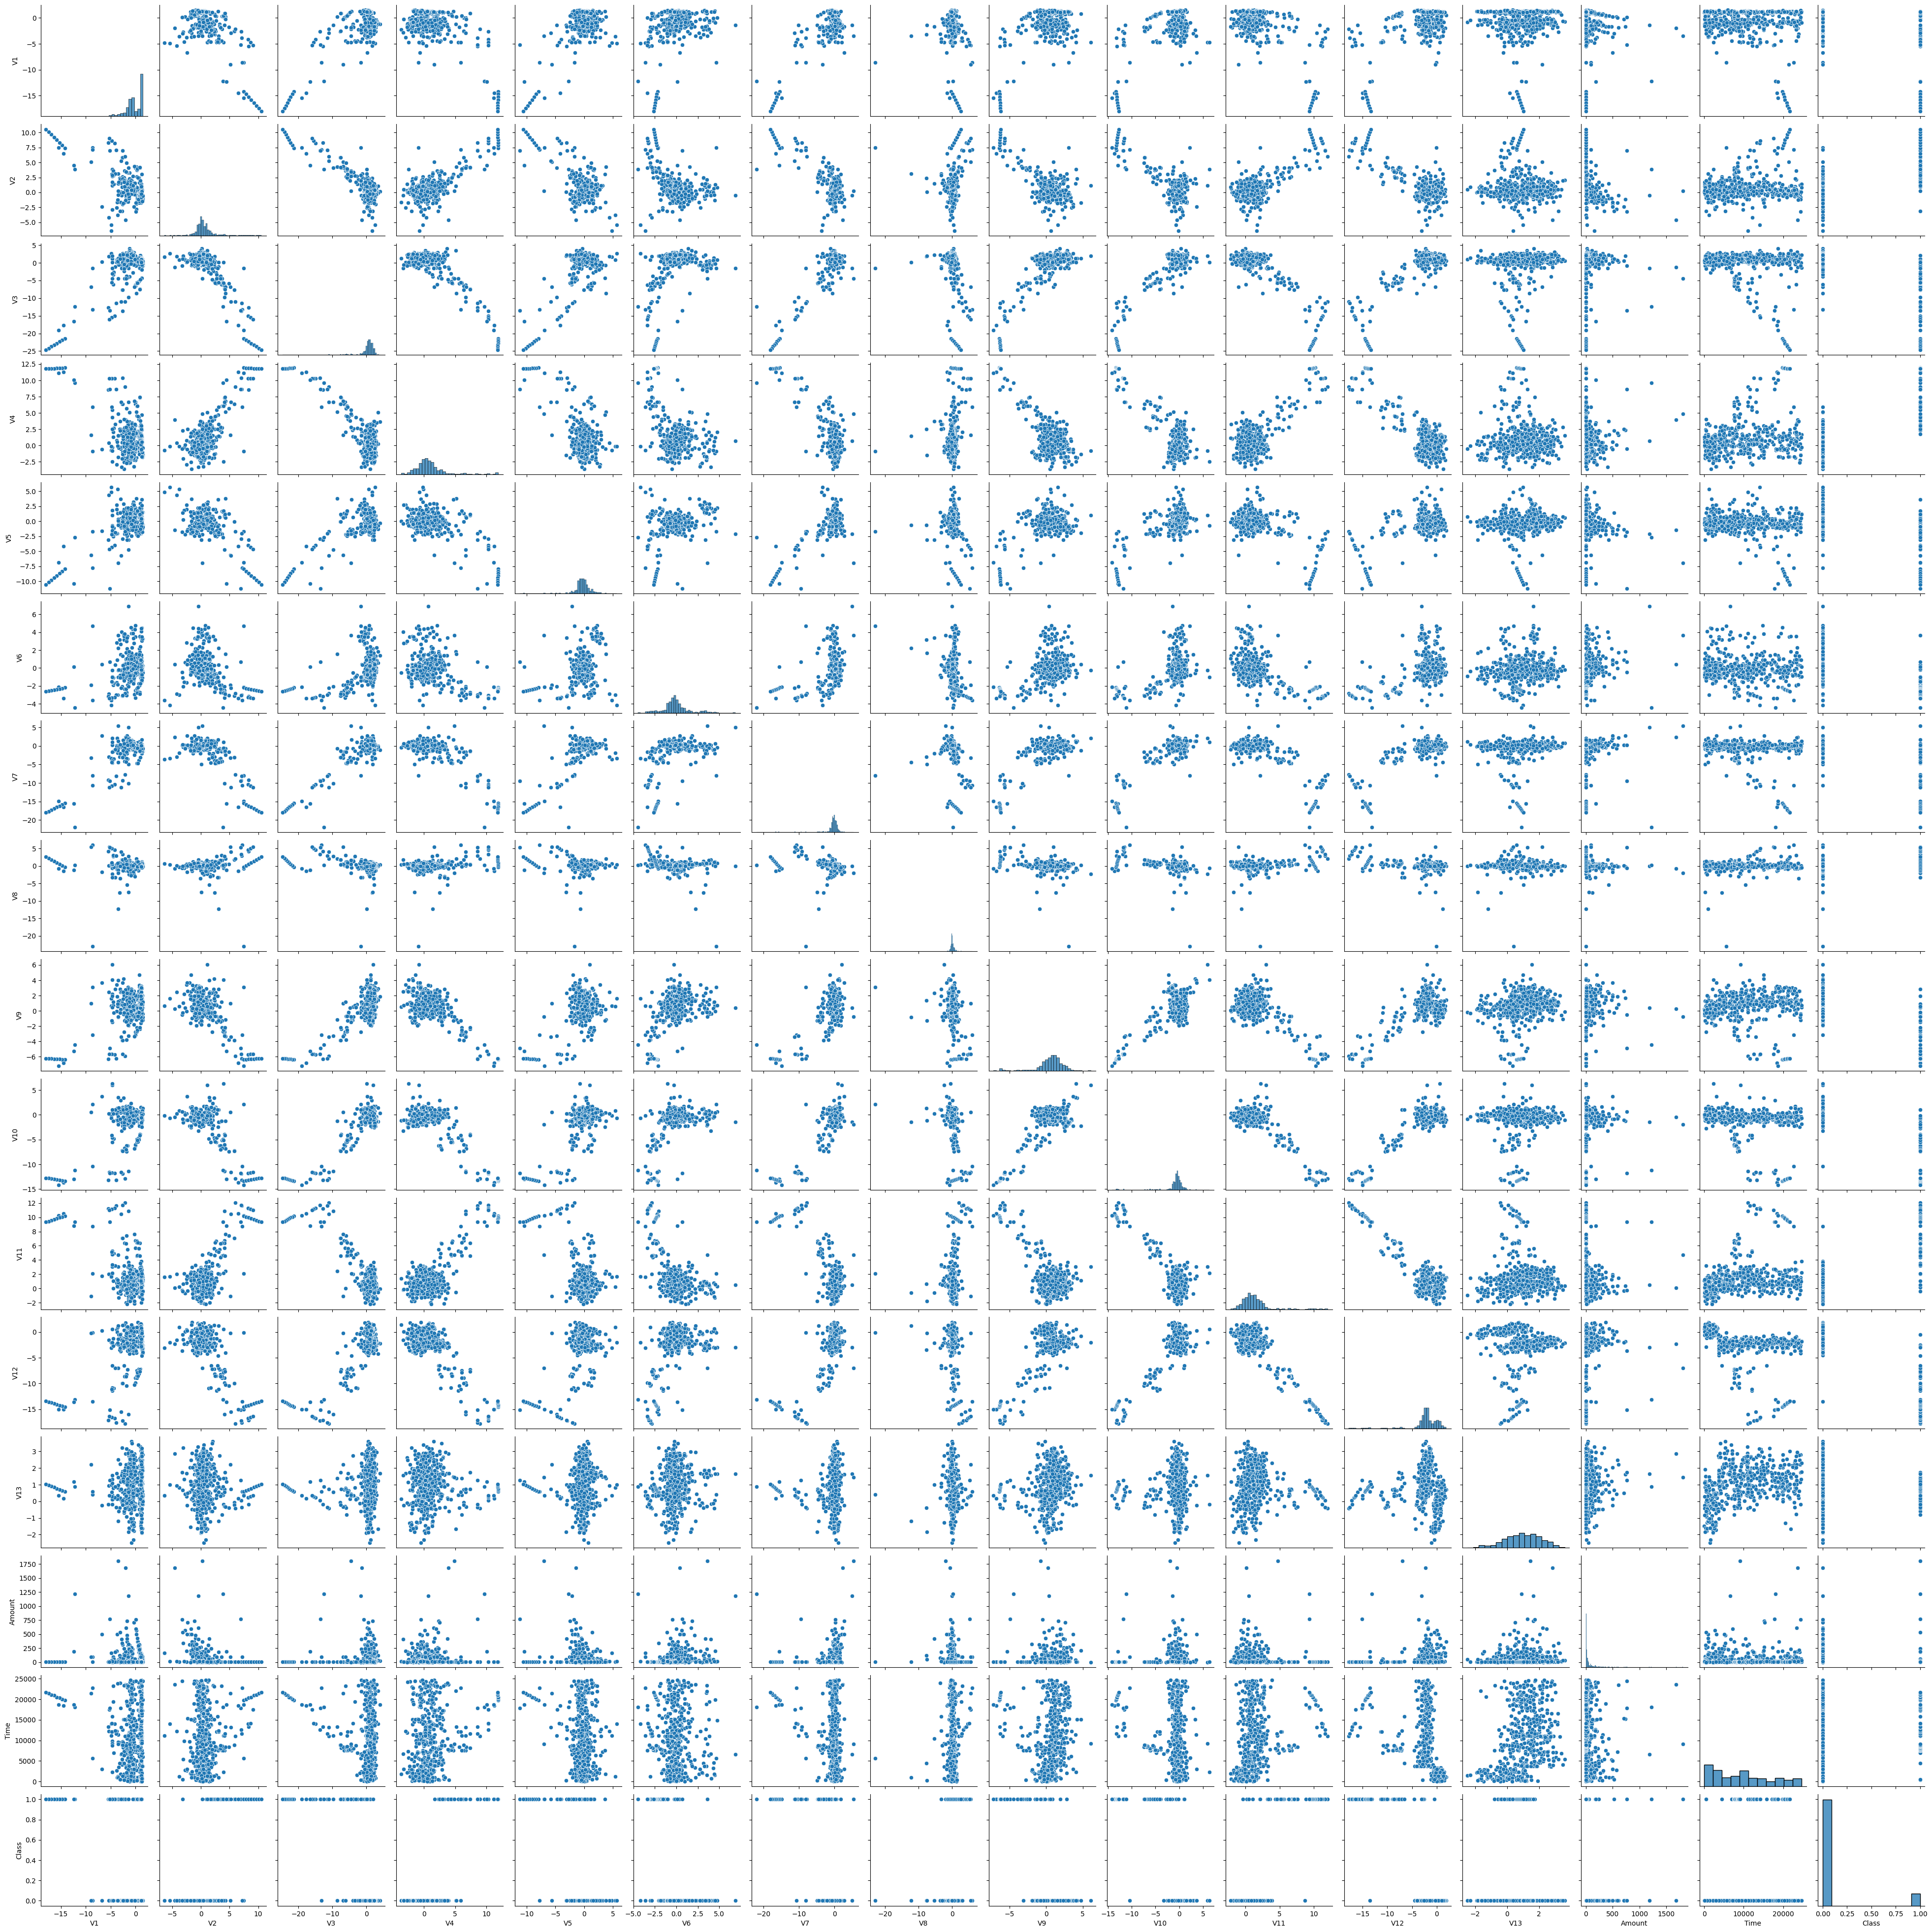

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns V1 to V13, 'Amount', 'Time', and 'Class'
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'Amount', 'Time', 'Class']

# Create a pairplot with the selected features
sns.pairplot(new_dataset[features_to_plot])
plt.show()

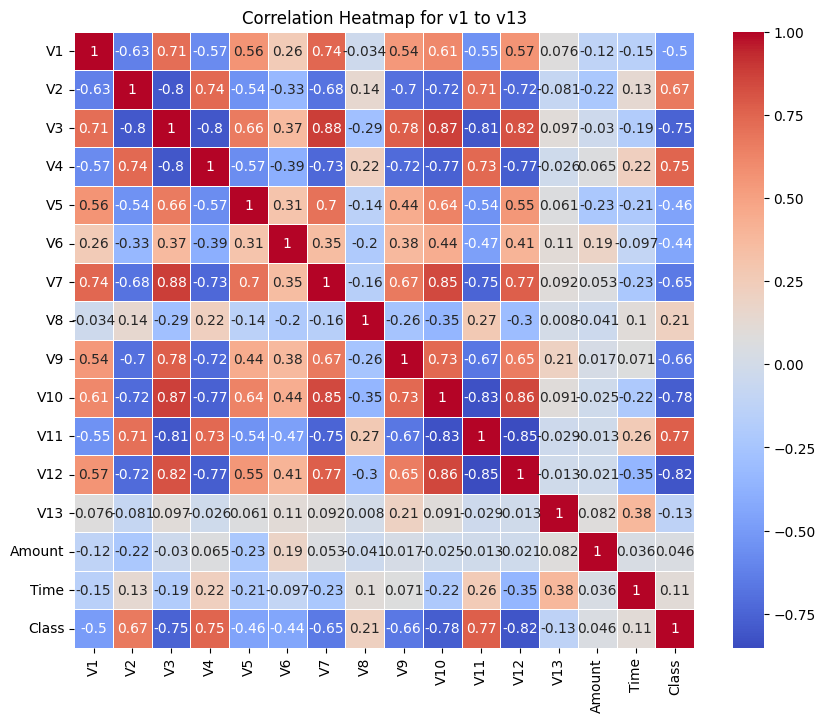

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns v1 to v13
correlation_matrix = new_dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'Amount', 'Time', 'Class']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for v1 to v13')
plt.show()


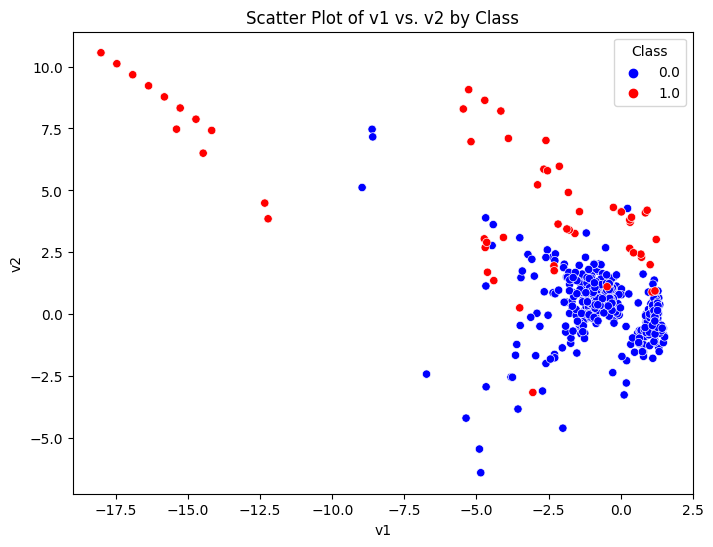

In [25]:
# Scatter Plot for two numeric features (e.g., 'v1' vs. 'v2')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', data=new_dataset, hue='Class', palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of v1 vs. v2 by Class')
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

Splitting the data into Features & Targets

In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [27]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
6399    7597  -1.680267   0.230668   1.362597  -0.137035  -2.181965  0.154388   
4266    3755   1.372955  -0.730758  -0.931581  -1.604395   1.443775  3.280036   
1659    1286  -1.953689   2.020370   0.220852   0.011983  -1.164103 -1.096646   
1165     909  -1.883261   0.491980   2.749590  -0.093186   0.872412  0.877891   
11481  19900   1.338104  -0.587704   0.720601  -0.302992  -1.201888 -0.597025   
...      ...        ...        ...        ...        ...        ...       ...   
11880  20451 -15.819179   8.775997 -22.804686  11.864868  -9.092361 -2.386893   
12070  20931 -16.367923   9.223692 -23.270631  11.844777  -9.462037 -2.450444   
12108  21046 -16.917468   9.669900 -23.736443  11.824990  -9.830548 -2.514829   
12261  21419 -17.467710  10.114816 -24.202142  11.805469 -10.198046 -2.579938   
12369  21662 -18.018561  10.558600 -24.667741  11.786180 -10.564657 -2.645681   

              V7        V8 

In [28]:
print(Y)

6399     0.0
4266     0.0
1659     0.0
1165     0.0
11481    0.0
        ... 
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, Length: 548, dtype: float64


## **Split** the data into Training data & Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(548, 30) (438, 30) (110, 30)


## Model Training

# **Logistic Regression**

In [31]:
model = LogisticRegression()

In [32]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score for training data

In [33]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9931506849315068


In [35]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [36]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9727272727272728


## **Performing hyperparameter tuning using GridSearchCV**

In [37]:
from sklearn.model_selection import GridSearchCV
parameteres=[
    {
        "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        "C":[100, 10, 1.0, 0.1, 0.01],
    }
]
# solver parameters related to the hypothesis used
# C is the the inverse of regularization strength in Logistic Regression , it is related to reduction of overfitting.

In [40]:
clf=GridSearchCV(estimator=model.fit(X_train,Y_train),param_grid=parameteres,cv=10)
clf_best=clf.fit(X_train,Y_train)
clf_best.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of

LogisticRegression(C=0.01)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.01,random_state=42,solver='newton-cg')
classifier.fit(X_train,Y_train)

LogisticRegression(C=0.01, random_state=42, solver='newton-cg')

In [42]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
acc_lr=accuracy_score(Y_test,y_pred)
acc_lr

0.9636363636363636

# **Decision tree classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=2)
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

acc_dt=accuracy_score(Y_test,y_pred)
print(acc_dt)

0.990909090909091


## **Random forest classifier**

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=42)
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,y_pred)
print(CM)
acc_rf=accuracy_score(Y_test,y_pred)
print("accuracy score",acc_rf)

[[98  1]
 [ 0 11]]
accuracy score 0.990909090909091


## **SVM Classifier**

In [47]:
from sklearn.svm import SVC
svm_classifier =SVC(kernel='linear', C=1.0)

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

In [48]:
print(accuracy)

0.9727272727272728


##Out of the four classifiers I tested, the Random Forest and Decision Tree classifiers emerged as the best performers, both achieving an impressive accuracy of 99%